# SAT & ACT Analysis



## Problem Statement

Students across the country are usually required to take either the ACT or SAT in order to apply and get into different universities and colleges. With most universities looking to diversify their student body, it is important for them to recruit from different states. Some states are requiring high school students to take one or the other. By requiring students to take either the SAT or the ACT, states are taking away students' ability to choose which test would be better for them.

We're going to take a look at aggregate SAT and ACT scores and participation rates from each state in the United States. We'll seek to identify trends in the data and combine our data analysis with outside research to identify likely factors influencing participation rates and scores in various states.


### Contents:
importing data
cleaning the data
eda
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [52]:
#Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')# color palette, https://seaborn.pydata.org/tutorial/color_palettes.html

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [53]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [54]:
#Code:
sat_2017.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [55]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


### Data Description

Each dataframe has different columns. The SAT evaluates each states total based on Evidence based reading and writing and math, whereas the ACT seperates it's scores into different categories. There are a couple of states where the participation is low (Alabama, Arkansas) in the SAT dataframe compared to the ACT

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [56]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [57]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [58]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Both the Composite and Participation columns are objects, but should be floats.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [59]:
#code
def convt_particp_rate():
    #data = data.map(lambda rate: rate.replace('%', '')).astype(int)/100
    sat_2017['Participation'] = sat_2017['Participation'].map(lambda rate: rate.replace('%', '')).astype(int)/100
    act_2017['Participation'] = act_2017['Participation'].map(lambda rate: rate.replace('%', '')).astype(int)/100
    #return data

In [60]:
convt_particp_rate()

- Fix any individual values preventing other columns from being the appropriate type.

In [61]:
#code
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [62]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [63]:
#code
act_2017['Composite']= act_2017['Composite'].map(lambda comp_num: comp_num.replace('x', '')).astype(float)

In [64]:
act_2017['Composite'].head()

0    21.0
1    19.2
2    19.8
3    19.7
4    19.4
Name: Composite, dtype: float64

- Display the data types again to confirm they are correct.

In [65]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [66]:
#code
new_act_columns_dict = {
        'State':'state',
        'Participation':'act_particp_17',
        'English':'act_eng_17',
        'Math':'act_math_17',
        'Reading':'act_read_17',
        'Science':'act_sci_17',
        'Composite':'act_comp_17'
    }
act_2017.rename(columns = new_act_columns_dict, inplace = True)

In [67]:
act_2017.columns

Index(['state', 'act_particp_17', 'act_eng_17', 'act_math_17', 'act_read_17',
       'act_sci_17', 'act_comp_17'],
      dtype='object')

In [68]:
new_sat_columns_dict = {
        'State':'state',
        'Participation':'sat_particp_17',
        'Evidence-Based Reading and Writing':'sat_read_write_17',
        'Math':'sat_math_17',
        'Total':'sat_total_17'
    }
sat_2017.rename(columns = new_sat_columns_dict, inplace = True)

In [69]:
sat_2017.columns

Index(['state', 'sat_particp_17', 'sat_read_write_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2017-2018|The place where the tests have been administerd.| 
|**sat_particp**|*float*|SAT|The percent of students that have taken the SAT in a particular state.|
|**sat_read_write**|*int*|SAT|The average score for the SAT Reading and Writing in a particular state.|
|**sat_math**|*int*|SAT|The average score for the SAT Math in a particular state.|
|**sat_total**|*int*|SAT|The total score for a particular state for the overall SAT test.|
|**act_particp**|*float*|ACT|The percent of students that have taken the SAT in a particular state.|
|**act_eng**|*float*|ACT|The average score for the ACT English in a particular state.|
|**act_math**|*float*|ACT|The average score for the ACT Math in a particular state.|
|**act_read**|*float*|ACT|The average score for the ACT Reading in a particular state.|
|**act_sci**|*float*|ACT|The average score for the ACT Science in a particular state.|
|**act_comp**|*float*|ACT|The total score for a particular state for the overall ACT test.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [70]:
#code
sat_2017.shape

(51, 5)

In [71]:
act_2017.shape

(52, 7)

In [72]:
act_2017.drop(act_2017.index[0], inplace=True)

In [73]:
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [74]:
#Code:

new_df=pd.merge(sat_2017, act_2017, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [75]:
#code
new_df.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [76]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [77]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1168
4,California,60%,540,536,1076


In [78]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [79]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [80]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [81]:
sat_2018['Participation'] = sat_2018['Participation'].map(lambda rate: rate.replace('%', '')).astype(int)/100
act_2018['Participation'] = act_2018['Participation'].map(lambda rate: rate.replace('%', '')).astype(int)/100

In [82]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [83]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [84]:
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [85]:
act_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [86]:
new_sat_columns_dict18 = {
        'State':'state',
        'Participation':'sat_particp_18',
        'Evidence-Based Reading and Writing':'sat_read_write_18',
        'Math':'sat_math_18',
        'Total':'sat_total_18'
    }
sat_2018.rename(columns = new_sat_columns_dict18, inplace = True)

In [87]:
new_act_columns_dict18 = {
        'State':'state',
        'Participation':'act_particp_18',
        'Composite':'act_comp_18'
    }
act_2018.rename(columns = new_act_columns_dict18, inplace = True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [88]:
new_df18 = pd.merge(sat_2018, act_2018, on='state')

In [89]:
final_df = pd.merge(new_df, new_df18, on='state')

In [90]:
final_df.to_csv('../data/final.csv')

In [91]:
df= pd.read_csv('../data/final.csv')

In [92]:
df.head()

,Unnamed: 0,state,sat_particp_17,sat_read_write_17,sat_math_17,sat_total_17,act_particp_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17,sat_particp_18,sat_read_write_18,sat_math_18,sat_total_18,act_particp_18,act_comp_18
0,0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1168,1.00,19.4
4,4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [93]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [94]:
#Code:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_particp_17,50.0,0.3860,0.345602,0.02,0.0400,0.340,0.650,1.0
sat_read_write_17,50.0,570.8600,44.385146,503.00,535.2500,559.500,613.500,644.0
sat_math_17,50.0,549.2200,84.998269,52.00,523.2500,549.500,601.000,651.0
sat_total_17,50.0,1129.6200,89.913085,996.00,1057.0000,1107.500,1214.000,1295.0
act_particp_17,50.0,0.6592,0.321107,0.08,0.3100,0.710,1.000,1.0
act_eng_17,50.0,20.8620,2.324307,16.30,19.0000,20.550,23.100,25.5
act_math_17,50.0,21.1360,1.973990,18.00,19.4000,20.900,23.000,25.3
act_read_17,50.0,21.9560,2.046317,18.10,20.4250,21.700,23.875,26.0
act_sci_17,50.0,20.9920,3.195139,2.30,19.9000,21.100,22.275,24.9
act_comp_17,50.0,21.4660,2.004241,17.80,19.8000,21.400,23.400,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [95]:
# Function that calculates the standard deviation for every column
def calc_std():
    for column in df.select_dtypes(exclude='object').columns:
        val= df[column]
        test_mean = float(sum(val)/ len(val))
        test_var = mean([(x - test_mean) ** 2 for x in val])
        std= np.sqrt(test_var)
        print(column,std)
        
calc_std()

sat_particp_17 0.3421286307808805
sat_read_write_17 43.9390532442382
sat_math_17 84.14399324966696
sat_total_17 89.00941298536914
act_particp_17 0.3178794740149165
act_eng_17 2.3009467616613812
act_math_17 1.9541504548012678
act_read_17 2.025750231395766
act_sci_17 3.1630263988781375
act_comp_17 1.9840977798485642
sat_particp_18 0.3669782009874701
sat_read_write_18 44.17132101262085
sat_math_18 48.179036935165065
sat_total_18 92.01000163025755
act_particp_18 0.33771254048376703
act_comp_18 2.090091864009809


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
#Code:


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [105]:
# Which states have the highest and lowest participation rates for the SAT 2017
final_df.sort_values(['act_particp_17']).head()


,state,sat_particp_17,sat_read_write_17,sat_math_17,sat_total_17,act_particp_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17,sat_particp_18,sat_read_write_18,sat_math_18,sat_total_18,act_particp_18,act_comp_18
18,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,997,0.17,23.8
28,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,538,1073,0.16,25.1
38,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
37,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7,0.70,547,539,1086,0.20,23.5


**Answer:**
- **States that have the highest SAT participation 2017:**
    - Michigan, Connecticut, Delaware, New Hampshire, Maine.
- **States that have the lowest SAT participation 2017:** 
    - North Dakota, Mississippi, Iowa, Missouri, Utah.
- **States that have the highest SAT participation 2018:** 
    - Michigan, Connecticut, Delaware, Idaho, Maine.
- **States that have the lowest SAT participation 2018:** 
    - North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin.
- **States that have the highest ACT participation 2017:** 
    - Alabama, Kentucky, Wisconsin, Utah, Tennessee.
- **States that have the lowest ACT participation 2017:** 
    - Maine, Delaware, New Hampshire, Rhode Island, Pennsylvania.
- **States that have the highest ACT participation 2018:** 
    - Alabama, Kentucky, Wisconsin, Utah, Tennessee.
- **States that have the lowest ACT participation 2018:** 
    - Maine, Rhode Island, New Hampshire, Delaware, Pennsylvania.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

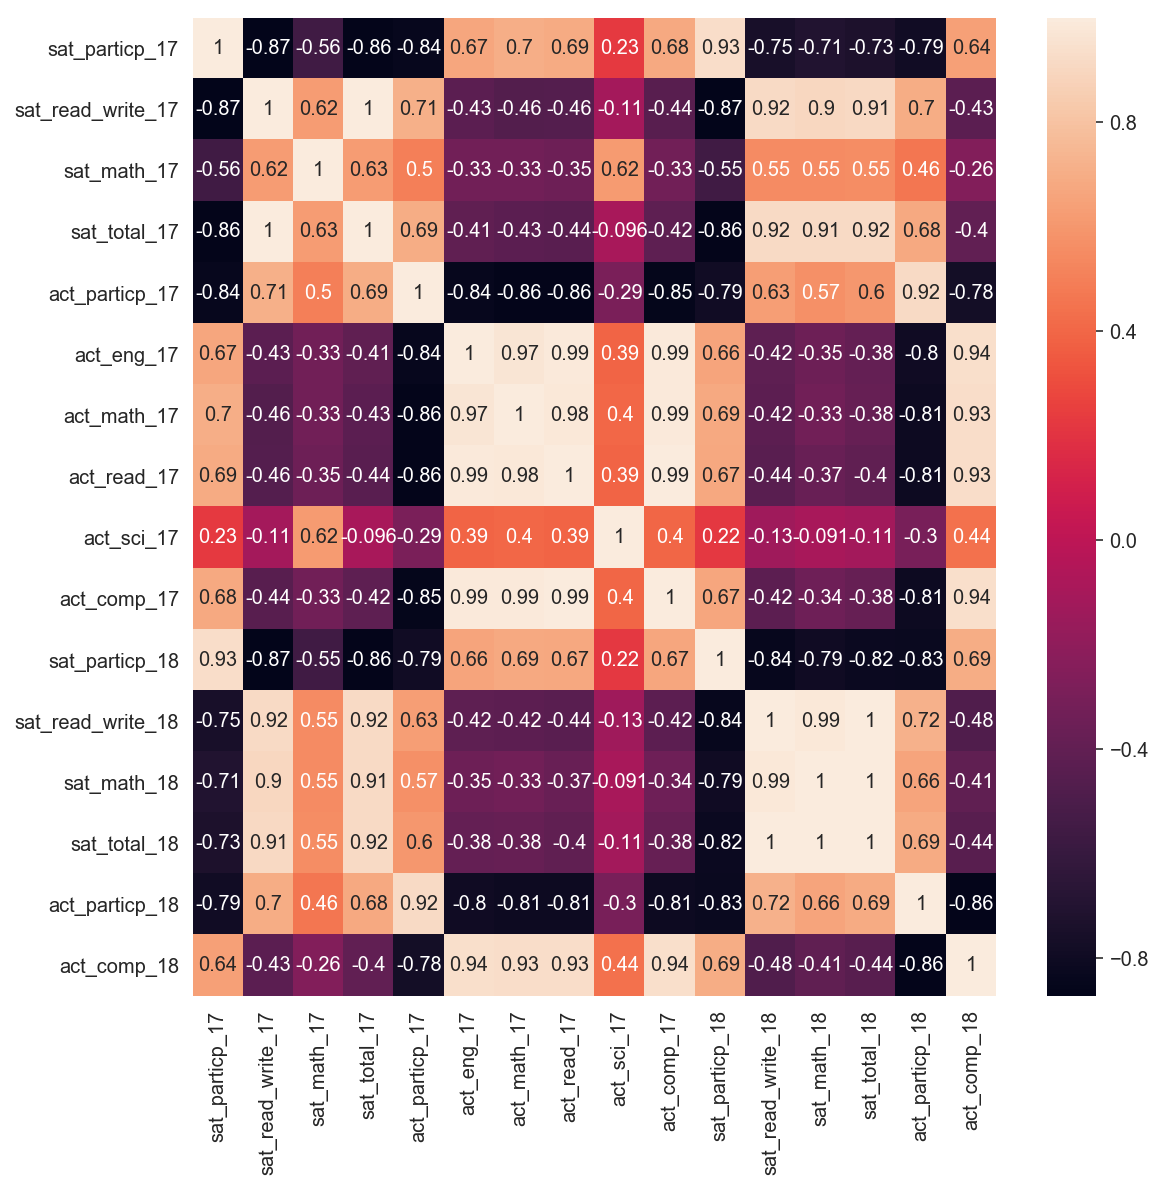

In [110]:
plt.figure(figsize=(9,9)) #increase the chart for better visibility
sns.heatmap(df.corr(), annot=True);


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Text(0, 0.5, 'Number of States')

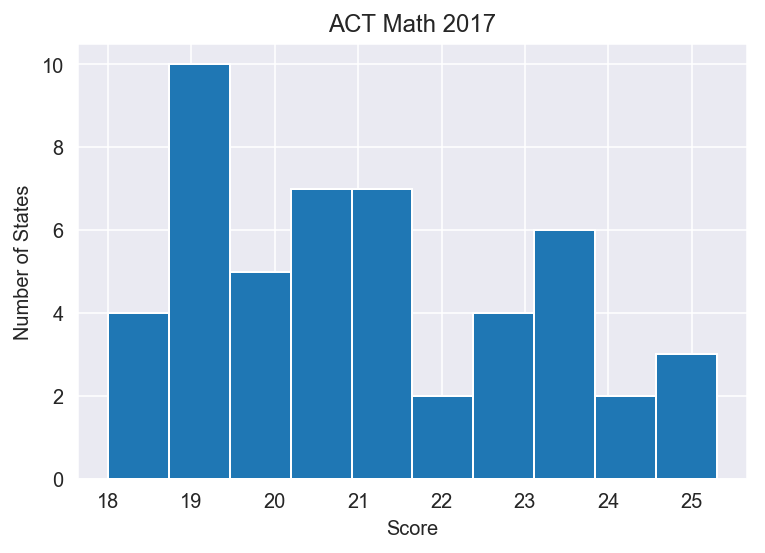

In [113]:
# Code
final_df['act_math_17'].hist()
plt.title('ACT Math 2017')
plt.xlabel('Score')
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

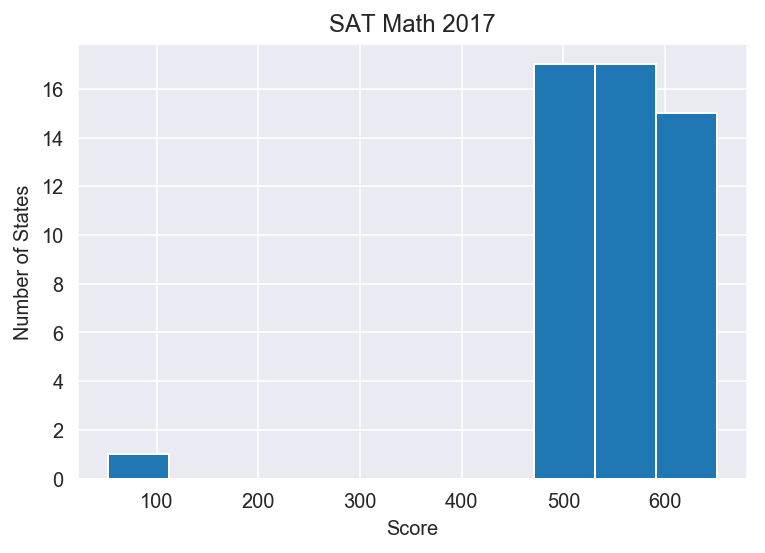

In [115]:
final_df['sat_math_17'].hist()
plt.title('SAT Math 2017')
plt.xlabel('Score')
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

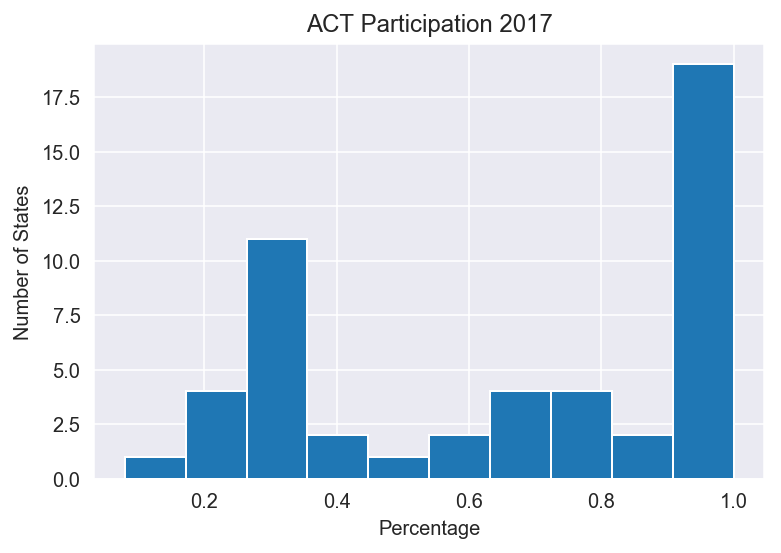

In [117]:
final_df['act_particp_17'].hist()
plt.title('ACT Participation 2017')
plt.xlabel('Percentage')
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

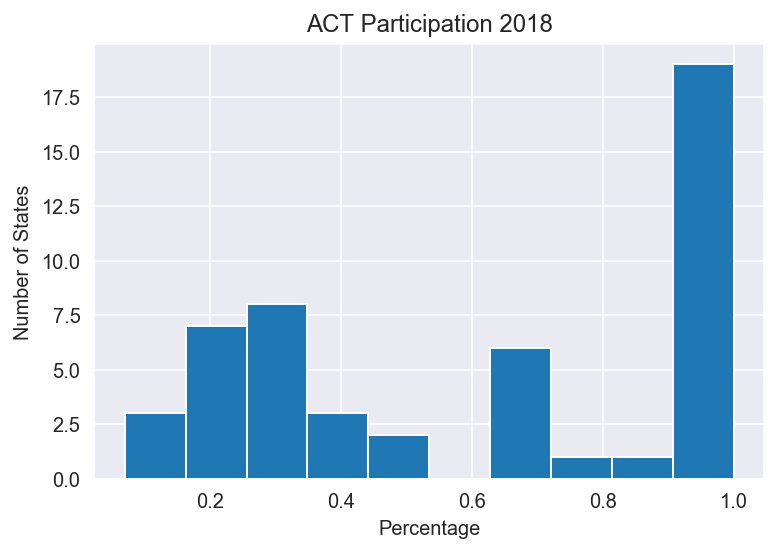

In [119]:
final_df['act_particp_18'].hist()
plt.title('ACT Participation 2018')
plt.xlabel('Percentage')
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

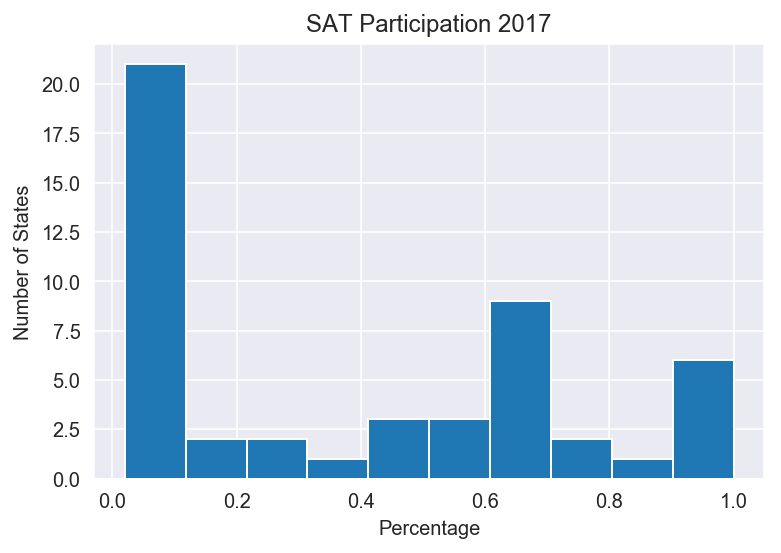

In [118]:
final_df['sat_particp_17'].hist()
plt.title('SAT Participation 2017')
plt.xlabel('Percentage')
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

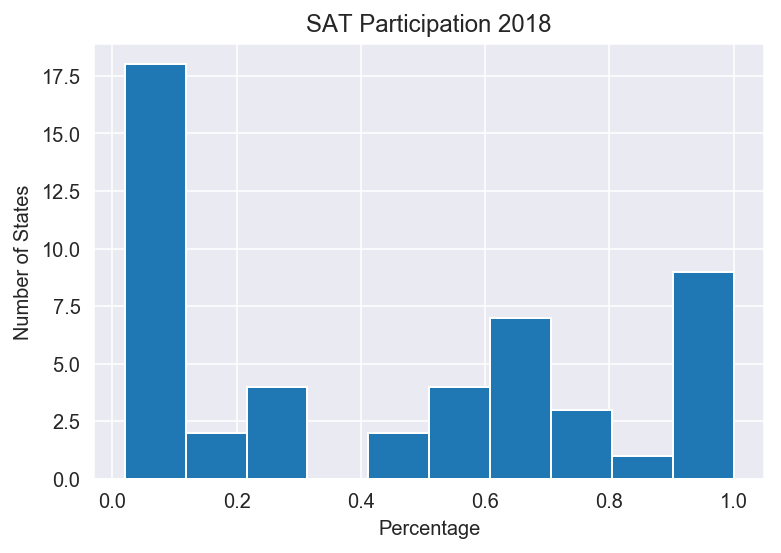

In [120]:
final_df['sat_particp_18'].hist()
plt.title('SAT Participation 2018')
plt.xlabel('Percentage')
plt.ylabel('Number of States')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


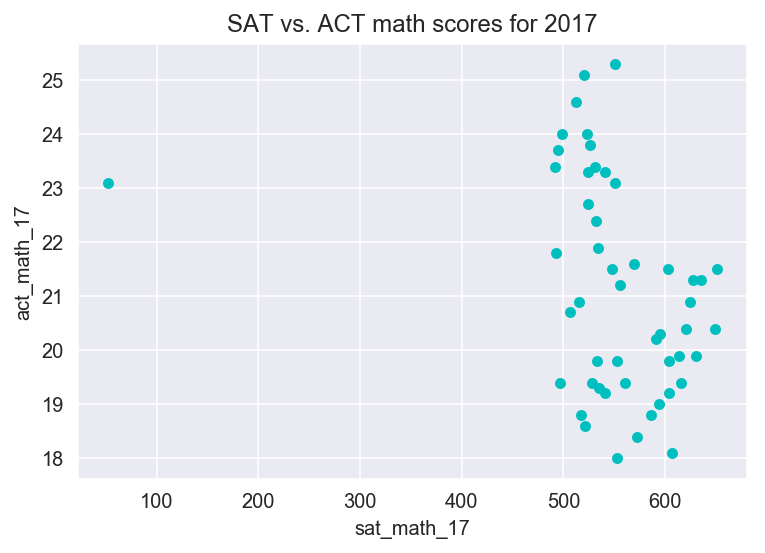

In [122]:
# SAT vs. ACT math scores for 2017
df.plot.scatter(x='sat_math_17',y='act_math_17',c='c', title='SAT vs. ACT math scores for 2017');



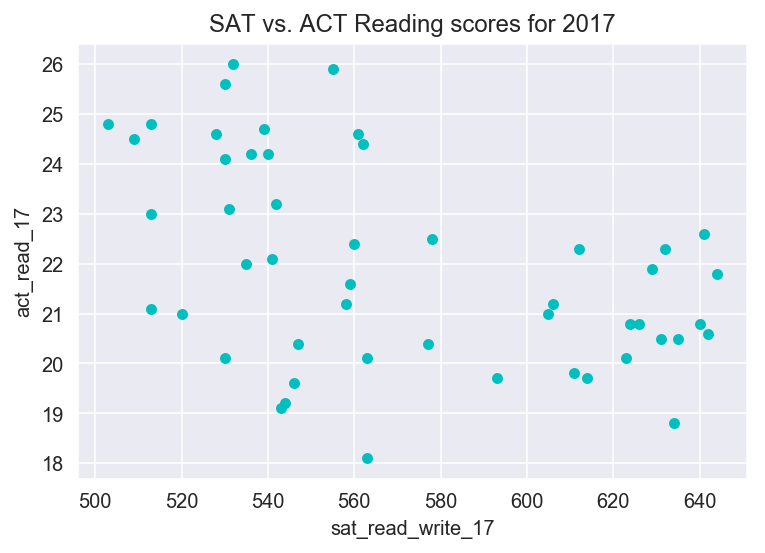

In [123]:
# SAT vs. ACT verbal/reading scores for 2017
df.plot.scatter(x='sat_read_write_17',y='act_read_17',c='c', title='SAT vs. ACT Reading scores for 2017');

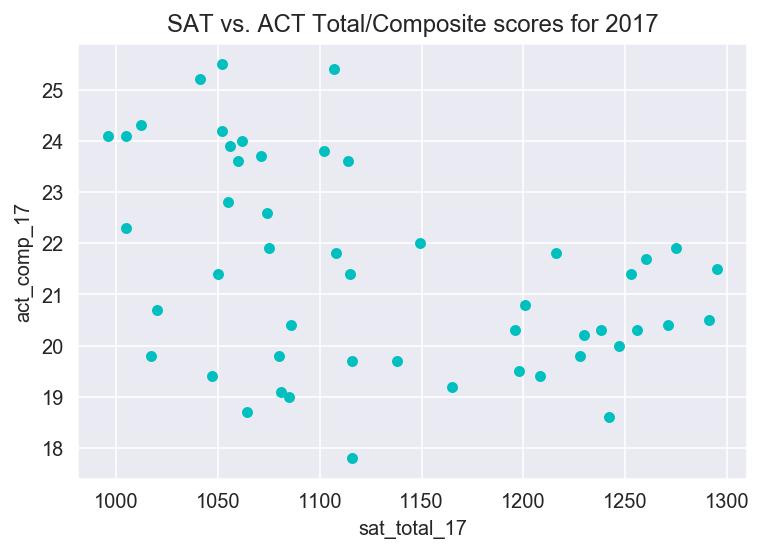

In [124]:
# SAT vs. ACT total/composite scores for 2017
df.plot.scatter(x='sat_total_17',y='act_comp_17',c='c', title='SAT vs. ACT Total/Composite scores for 2017');

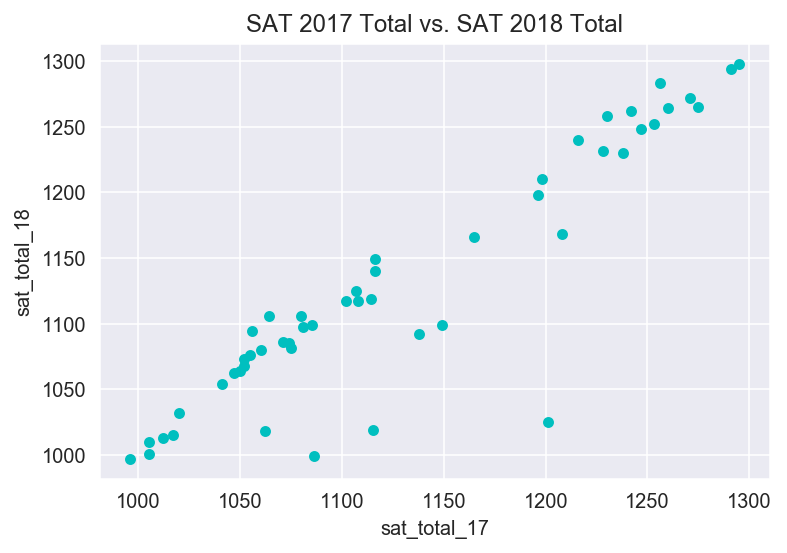

In [125]:
# Total scores for SAT 2017 vs. 2018
df.plot.scatter(x='sat_total_17',y='sat_total_18',c='c', title='SAT 2017 Total vs. SAT 2018 Total');

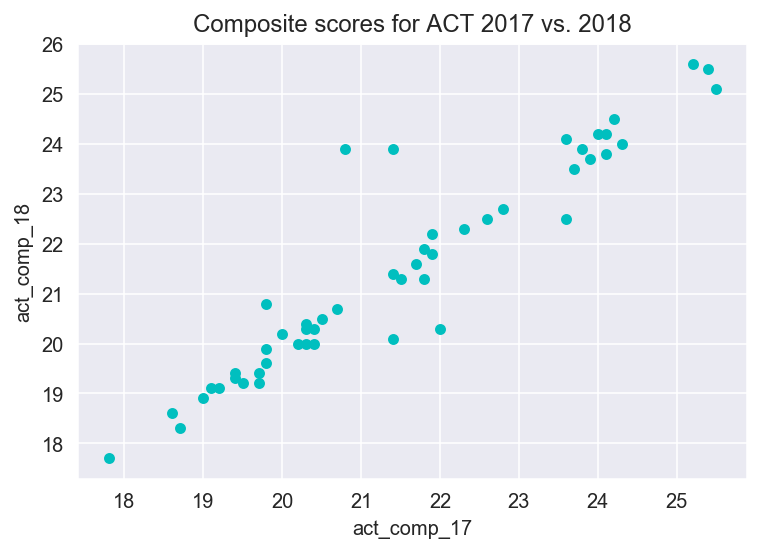

In [126]:
# Composite scores for ACT 2017 vs. 2018
df.plot.scatter(x='act_comp_17',y='act_comp_18',c='c', title='Composite scores for ACT 2017 vs. 2018');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'ACT Composite Scores 2017')

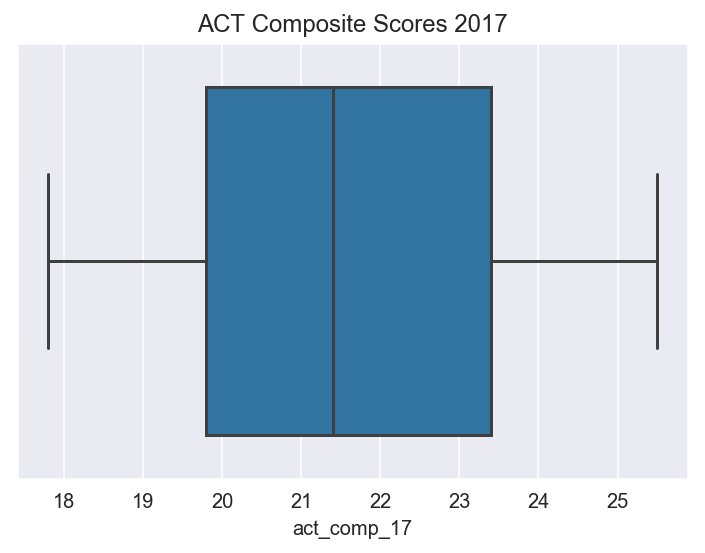

In [132]:
# Code
sns.boxplot(df.act_comp_17).set_title('ACT Composite Scores 2017')


Text(0.5, 1.0, 'ACT Composite Scores 2018')

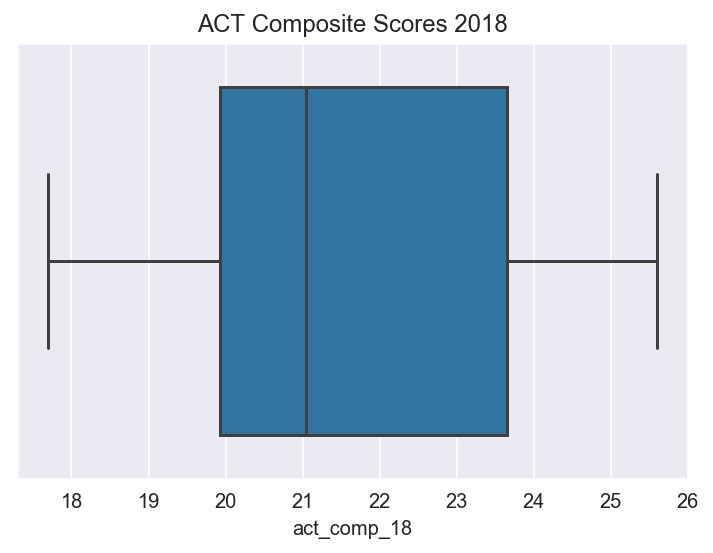

In [133]:
sns.boxplot(df.act_comp_18).set_title('ACT Composite Scores 2018')


Text(0.5, 1.0, 'SAT Total Scores 2017')

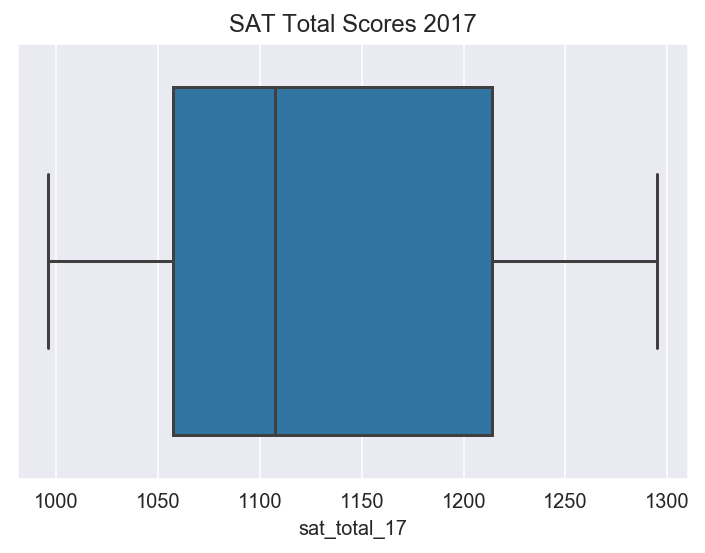

In [134]:
sns.boxplot(df.sat_total_17).set_title('SAT Total Scores 2017')


Text(0.5, 1.0, 'SAT Total Scores 2018')

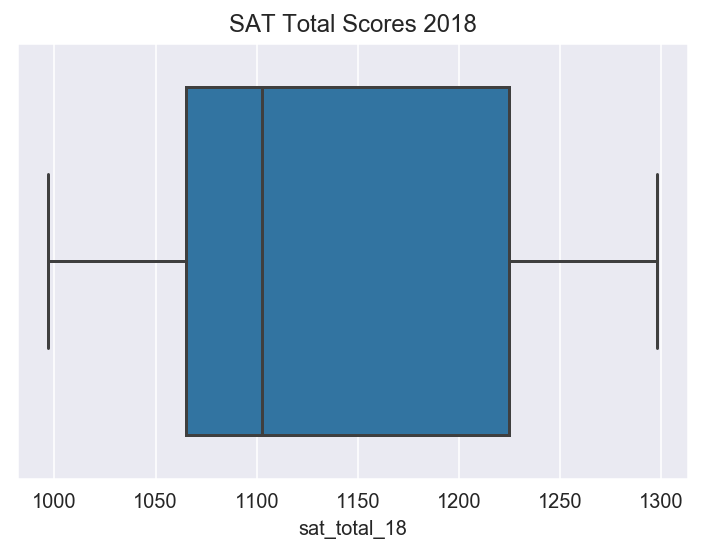

In [135]:
sns.boxplot(df.sat_total_18).set_title('SAT Total Scores 2018')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

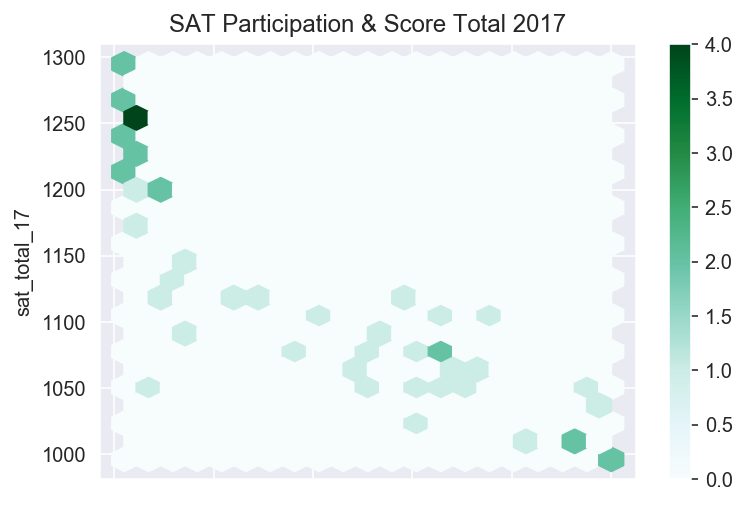

In [140]:
final_df.plot(kind="Hexbin", x='sat_particp_17', y='sat_total_17', title= 'SAT Participation & Score Total 2017', gridsize=20);

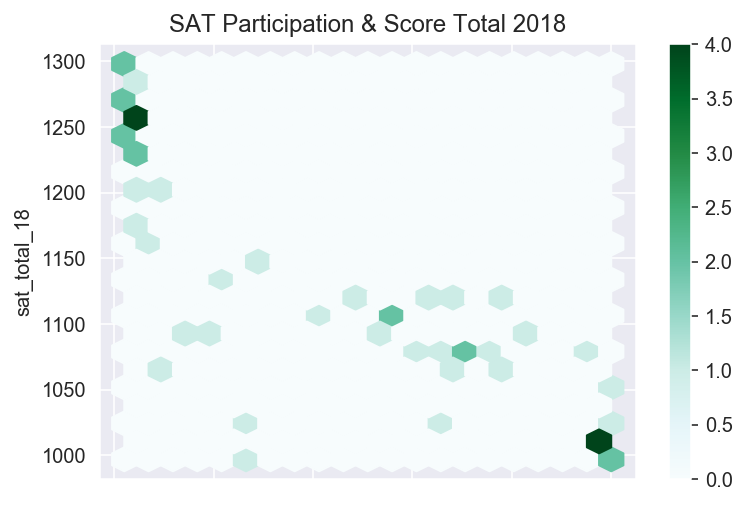

In [141]:
final_df.plot(kind="Hexbin", x='sat_particp_18', y='sat_total_18', title= 'SAT Participation & Score Total 2018',gridsize=20);

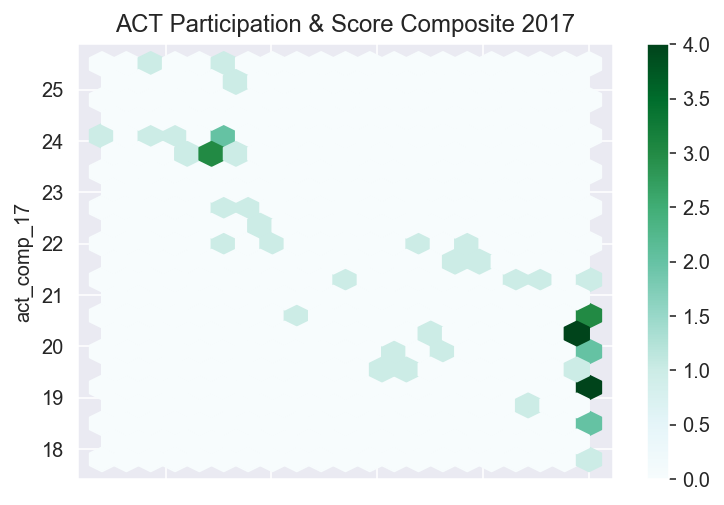

In [142]:
final_df.plot(kind="Hexbin", x='act_particp_17', y='act_comp_17',title= 'ACT Participation & Score Composite 2017', gridsize=20);

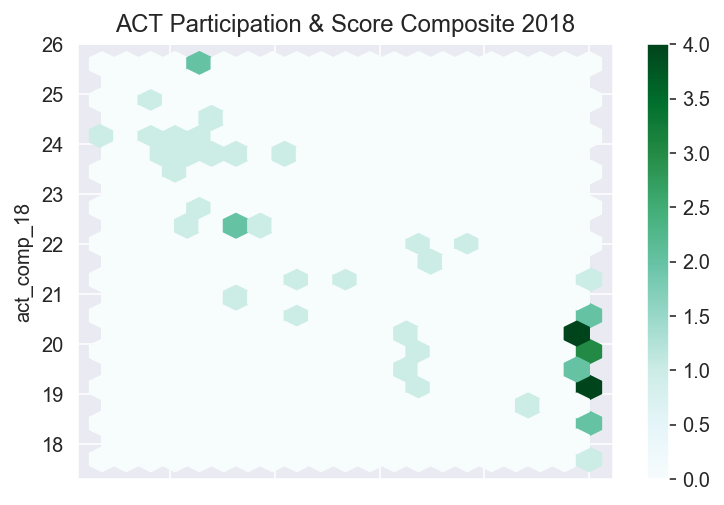

In [143]:
final_df.plot(kind="Hexbin", x='act_particp_18', y='act_comp_18',title= 'ACT Participation & Score Composite 2018', gridsize=20);

Because higher participation tends to be associated with lower average scores, it is hard to compare SAT and ACT scores by state. Most states with high participation rates in one test have low participation rates in the other, which often means that states that have high averages on one test, have low averages for the other. In states like Georgia, where participation in the SAT and in the ACT are nearly equally as common, scores tend to be very close to the national averages for each test.

## Descriptive and Inferential Statistics

## Executive Summary

## Research

## Conclusions and Recommendations